In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
from lib_file import lib_path

for dirname, _, filenames in os.walk('splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


In [2]:
X_train = pd.read_csv('splitted_data/X_train.csv')
X_test = pd.read_csv('splitted_data/X_test.csv')
y_train = pd.read_csv('splitted_data/y_train.csv')
y_test = pd.read_csv('splitted_data/y_test.csv')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(72000, 77) (18000, 77) (72000, 1) (18000, 1)


In [3]:
X_train.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.000000,0.000006,0.023606,0.000000,0.219232,0.000000,0.124189,0.105960,0.162721,0.027193,0.000000,0.00000,0.000000,0.0,2.074113e-02,2.327127e-02,2.688749e-07,3.405434e-07,9.505296e-07,0.000000e+00,0.000006,2.800813e-07,3.583638e-07,9.588676e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,2.327128e-02,0.000000e+00,0.152174,0.011591,0.121695,0.005752,3.308514e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123358,0.162721,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.023606,0.219232,0.000000,0.000000,0.000000,0.000000,0.129944,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.352941,0.011402,0.001026,0.000435,0.000029,0.000000,0.000282,0.000473,0.000375,0.000000,0.000000,0.00000,0.000000,0.0,1.501508e-09,1.087805e-06,6.964144e-03,6.485228e-03,8.454702e-03,0.000000e+00,0.008450,8.686252e-03,9.051928e-03,8.454711e-03,0.000000e+00,8.341075e-09,1.696607e-08,0.000000,8.483035e-09,0.004016,0.0,0.0,0.0,0.0,1.0,0.999965,7.287382e-07,7.308590e-07,0.000000,0.000026,0.000200,0.000078,6.080699e-09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000234,0.000375,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.000029,0.000435,0.000000,0.980240,0.474380,0.005650,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.000908,0.001026,0.000000,0.010381,0.000000,0.109794,0.156102,0.134842,0.025556,0.000000,0.00000,0.000000,0.0,6.779872e-06,9.171219e-06,9.240980e-04,9.240704e-04,9.082727e-04,2.569894e-08,0.000908,9.331801e-04,9.724266e-04,9.082811e-04,2.569894e-08,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,9.177581e-06,0.000000e+00,0.224185,0.010248,0.099170,0.005164,2.667031e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123887,0.134842,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.010381,0.000000,0.000000,0.000000,0.000000,0.005650,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.352941,0.311945,0.003079,0.001738,0.000433,0.000005,0.001693,0.002838,0.002250,0.000000,0.000158,0.00411,0.001315,0.0,1.481879e-09,1.117344e-07,5.603610e-02,6.090439e-02,9.167900e-02,0.000000e+00,0.311945,1.068853e-01,7.762896e-02,9.167984e-02,0.000000e+00,2.443000e-01,7.098793e-02,0.063571,9.327439e-02,0.004016,0.0,0.0,0.0,0.0,1.0,0.999965,6.466671e-08,1.068599e-07,0.004076,0.000158,0.001683,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001775,0.002250,0.001315,0.0,0.0,0.0,0.0,0.0,0.0,0.003079,0.000433,0.001738,0.000005,0.089127,0.000015,0.016949,0.999999,0.000009,0.000004,0.000005,0.000005,0.079664,0.022019,0.093603,0.067787
4,1.000000,0.025019,0.001026,0.000000,0.014900,0.000000,0.145639,0.244087,0.193542,0.000000,0.000000,0.00000,0.000000,0.0,3.531084

In [4]:
X_test.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.000000,0.001799,0.001711,0.000000,0.015074,0.000000,0.110923,0.151845,0.130528,0.026325,0.000000,0.0,0.000000,0.000000,0.000005,0.000007,1.098602e-03,8.688812e-04,9.200376e-04,0.000000e+00,0.001799,1.109398e-03,9.143494e-04,9.200460e-04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,0.000007,0.000000,0.218071,0.010353,0.096517,0.005372,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.112535,0.130528,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001711,0.015074,0.000000,0.000000,0.000000,0.000000,0.009416,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.352941,0.011657,0.009237,0.008909,0.018120,0.000234,0.102173,0.000000,0.033623,0.067377,0.006876,0.0,0.011044,0.009552,0.000002,0.000012,5.234897e-04,8.340758e-04,3.459236e-03,5.139789e-08,0.011210,1.280280e-03,1.514515e-03,3.903433e-03,5.139789e-08,0.011225,0.000571,0.000853,0.003519,0.008032,0.0,0.0,0.0,0.0,1.0,0.999966,0.000005,0.000015,0.000000,0.009536,0.018334,0.012382,0.000153,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076923,0.018588,0.033623,0.011044,0.0,0.0,0.0,0.0,0.0,0.0,0.009237,0.018120,0.008909,0.000234,0.125015,0.003769,0.045198,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.352941,0.000003,0.001026,0.000000,0.000888,0.000000,0.012983,0.000000,0.011534,0.016269,0.000000,0.0,0.000000,0.000000,0.000206,0.003257,2.595805e-06,2.540681e-06,2.509732e-06,5.139789e-08,0.000003,2.629859e-06,2.673634e-06,2.518070e-06,5.139789e-08,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.999965,0.003257,0.000000,0.000000,0.001212,0.009479,0.003193,0.000010,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.011842,0.011534,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.000888,0.000000,0.000000,0.003891,0.000000,0.003766,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.000004,0.008553,0.000000,0.077390,0.000000,0.124189,0.037843,0.154649,0.073396,0.000000,0.0,0.000000,0.000000,0.012657,0.014943,4.343307e-07,5.190103e-07,9.255157e-07,0.000000e+00,0.000004,4.471616e-07,5.461699e-07,9.338536e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,0.014943,0.000000,0.054348,0.011591,0.115922,0.015354,0.000236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.120308,0.154649,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.008553,0.077390,0.000000,0.000000,0.000000,0.000000,0.047081,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.000002,0.002395,0.000000,0.020214,0.000000,0.124189,0.037843,0.131279,0.125027,0.000000,0.0,0.000000,0.000000,0.005531,0.007692,9.367680e-07,9.109076e-07,1.242359e-06,2.569894e-08,0.000002,9.545322e-07,9.585749e-07,1.250697e-06,2.569894e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,0.007692,0.000000,0.054348,0.011591,0.100964,0.025369,0.000644,0.0

In [5]:
y_train.head()

,Label
0,1
1,0
2,4
3,2
4,3


In [6]:
y_test.head()

,Label
0,4
1,0
2,0
3,1
4,1


# Support Vector Classifier Model

In [7]:
from sklearn.svm import SVC

In [8]:
svc_model = SVC(kernel='rbf', C=0.01)
svc_model = svc_model.fit(X_train.values, y_train.values.ravel())

In [12]:

svc_prediction = svc_model.predict(X_test.values)
print(svc_prediction.tolist())

[4, 2, 0, 4, 4, 0, 4, 2, 2, 3, 4, 4, 2, 1, 4, 4, 0, 4, 3, 3, 3, 4, 4, 4, 2, 4, 3, 0, 3, 1, 3, 3, 4, 4, 2, 4, 4, 3, 4, 2, 4, 0, 0, 4, 2, 2, 4, 4, 1, 2, 4, 0, 1, 4, 1, 0, 2, 4, 4, 4, 4, 0, 2, 0, 1, 4, 2, 1, 4, 0, 3, 4, 4, 0, 0, 0, 3, 2, 4, 3, 3, 3, 0, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 4, 4, 0, 3, 3, 4, 0, 4, 3, 4, 4, 2, 0, 2, 1, 4, 0, 2, 4, 3, 2, 2, 0, 0, 4, 0, 3, 4, 2, 0, 4, 3, 3, 4, 3, 0, 0, 3, 0, 0, 4, 1, 0, 2, 4, 0, 4, 4, 0, 3, 3, 2, 0, 3, 1, 4, 2, 4, 2, 3, 4, 1, 4, 0, 2, 0, 0, 2, 3, 1, 2, 0, 3, 2, 4, 2, 3, 0, 0, 1, 2, 2, 1, 3, 4, 2, 1, 0, 2, 3, 3, 3, 1, 4, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 0, 4, 4, 4, 4, 3, 4, 0, 3, 4, 0, 3, 2, 4, 0, 2, 2, 1, 0, 3, 0, 0, 1, 2, 0, 0, 4, 1, 0, 4, 3, 2, 4, 4, 1, 0, 1, 4, 2, 4, 3, 2, 2, 2, 1, 4, 2, 0, 1, 3, 3, 4, 0, 4, 0, 0, 0, 4, 4, 1, 3, 2, 3, 2, 2, 4, 3, 2, 1, 0, 3, 3, 0, 0, 0, 2, 4, 2, 0, 3, 2, 4, 3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 4, 4, 2, 3, 2, 2, 0, 2, 0, 1, 4, 3, 0, 2, 4, 3, 2, 4, 1, 3, 4, 4, 2, 2, 2, 4, 2, 2, 3, 2, 1, 2, 0, 4, 2, 4, 3, 0, 2, 4, 3, 1, 

In [13]:
true_labels = y_test.values.ravel()
print(true_labels.tolist())

[4, 0, 0, 1, 1, 0, 1, 2, 2, 3, 4, 4, 2, 1, 1, 4, 0, 1, 3, 3, 3, 4, 4, 4, 2, 1, 3, 0, 3, 1, 3, 3, 4, 1, 2, 1, 4, 3, 1, 2, 4, 0, 0, 1, 2, 2, 1, 1, 1, 2, 4, 0, 1, 4, 1, 0, 2, 1, 4, 1, 4, 0, 2, 0, 1, 4, 2, 1, 1, 0, 3, 1, 1, 0, 0, 0, 3, 2, 1, 3, 3, 3, 0, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 1, 4, 0, 3, 3, 4, 0, 1, 3, 1, 4, 2, 0, 2, 1, 4, 0, 2, 4, 3, 2, 2, 0, 0, 1, 0, 3, 1, 2, 0, 4, 3, 3, 1, 3, 0, 0, 3, 0, 0, 4, 1, 0, 2, 4, 0, 4, 4, 0, 3, 3, 2, 0, 3, 1, 4, 2, 4, 2, 3, 4, 1, 4, 0, 2, 0, 0, 2, 1, 1, 2, 0, 3, 2, 4, 2, 3, 0, 0, 1, 2, 2, 1, 3, 4, 2, 1, 0, 2, 3, 3, 3, 1, 1, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 0, 4, 1, 4, 4, 3, 1, 0, 3, 1, 0, 3, 2, 4, 0, 0, 2, 1, 0, 3, 0, 0, 1, 2, 0, 0, 4, 1, 0, 1, 3, 2, 4, 4, 1, 0, 1, 4, 2, 1, 3, 2, 2, 2, 1, 1, 2, 0, 1, 3, 3, 1, 0, 4, 0, 0, 0, 4, 1, 1, 3, 2, 3, 2, 2, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0, 2, 4, 2, 0, 3, 2, 1, 3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 4, 1, 2, 3, 2, 0, 0, 2, 0, 1, 4, 3, 0, 2, 4, 3, 2, 4, 1, 3, 1, 4, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 0, 4, 2, 1, 3, 0, 2, 4, 3, 1, 

In [14]:
class_labels = ['Benign', 'DrDoS_NTP', 'Syn', 'TFTP', 'UDP']

In [15]:
svc_model_accuracy = accuracy_score(y_true=true_labels, y_pred=svc_prediction)
print("Validation accuracy of SupportVectorClassifier model is {:.2f}%".format(svc_model_accuracy*100))

Validation accuracy of SupportVectorClassifier model is 89.29%


In [16]:
print(classification_report(y_true=true_labels, y_pred=svc_prediction, target_names=class_labels))

              precision    recall  f1-score   support

      Benign       0.99      0.93      0.96      3634
   DrDoS_NTP       1.00      0.55      0.71      3585
         Syn       0.94      1.00      0.96      3610
        TFTP       0.97      1.00      0.98      3593
         UDP       0.70      0.99      0.82      3578

    accuracy                           0.89     18000
   macro avg       0.92      0.89      0.89     18000
weighted avg       0.92      0.89      0.89     18000



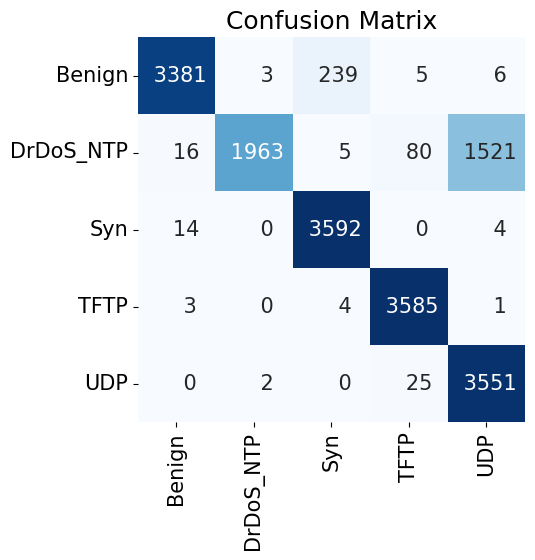

In [17]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_labels, y_pred=svc_prediction),
            annot=True,
            cmap=plt.cm.Blues,
            fmt = "5d",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [18]:
with open(file="models/SupportVectorClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=svc_model, file=file)

---

# AdaBoost Classifier Model

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
base_estimator = DecisionTreeClassifier(max_depth=2)

In [21]:
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=2.0)
ada_model = ada_model.fit(X_train.values, y_train.values.ravel())

In [22]:
ada_prediction = ada_model.predict(X_test.values)
print(ada_prediction.tolist())

[4, 1, 0, 1, 1, 0, 1, 0, 2, 3, 4, 4, 2, 1, 4, 4, 0, 4, 3, 3, 3, 4, 4, 4, 2, 1, 3, 0, 3, 4, 3, 3, 4, 1, 2, 1, 4, 3, 1, 2, 4, 1, 0, 4, 2, 2, 4, 4, 1, 2, 4, 0, 4, 4, 1, 0, 2, 1, 4, 1, 4, 0, 2, 0, 1, 4, 2, 4, 4, 0, 3, 4, 4, 0, 0, 0, 3, 2, 4, 3, 3, 3, 0, 3, 0, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 4, 4, 3, 3, 3, 4, 0, 1, 3, 1, 4, 2, 0, 2, 1, 4, 0, 2, 4, 3, 2, 2, 0, 1, 4, 0, 3, 1, 2, 0, 4, 3, 3, 4, 3, 0, 2, 3, 0, 3, 4, 1, 0, 2, 4, 1, 4, 4, 0, 3, 3, 2, 0, 3, 1, 4, 2, 4, 0, 3, 4, 4, 4, 0, 2, 0, 0, 2, 4, 1, 2, 0, 3, 2, 4, 2, 3, 0, 0, 1, 2, 2, 4, 3, 4, 2, 4, 0, 2, 3, 3, 3, 4, 4, 3, 2, 4, 4, 4, 3, 2, 2, 2, 3, 2, 4, 1, 4, 4, 3, 4, 2, 3, 4, 2, 3, 2, 4, 0, 0, 2, 1, 0, 3, 0, 0, 1, 2, 0, 0, 4, 4, 0, 1, 3, 2, 4, 4, 4, 0, 4, 4, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 4, 3, 1, 0, 4, 4, 1, 3, 2, 3, 2, 2, 4, 3, 2, 4, 0, 3, 3, 0, 0, 0, 2, 4, 2, 0, 3, 2, 4, 3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 4, 1, 0, 3, 2, 3, 0, 2, 0, 1, 4, 3, 0, 2, 4, 3, 2, 4, 1, 3, 1, 4, 0, 0, 2, 1, 2, 2, 3, 2, 4, 2, 0, 4, 2, 4, 3, 0, 2, 4, 3, 4, 

In [23]:
true_labels = y_test.values.ravel()
print(true_labels.tolist())

[4, 0, 0, 1, 1, 0, 1, 2, 2, 3, 4, 4, 2, 1, 1, 4, 0, 1, 3, 3, 3, 4, 4, 4, 2, 1, 3, 0, 3, 1, 3, 3, 4, 1, 2, 1, 4, 3, 1, 2, 4, 0, 0, 1, 2, 2, 1, 1, 1, 2, 4, 0, 1, 4, 1, 0, 2, 1, 4, 1, 4, 0, 2, 0, 1, 4, 2, 1, 1, 0, 3, 1, 1, 0, 0, 0, 3, 2, 1, 3, 3, 3, 0, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 1, 4, 0, 3, 3, 4, 0, 1, 3, 1, 4, 2, 0, 2, 1, 4, 0, 2, 4, 3, 2, 2, 0, 0, 1, 0, 3, 1, 2, 0, 4, 3, 3, 1, 3, 0, 0, 3, 0, 0, 4, 1, 0, 2, 4, 0, 4, 4, 0, 3, 3, 2, 0, 3, 1, 4, 2, 4, 2, 3, 4, 1, 4, 0, 2, 0, 0, 2, 1, 1, 2, 0, 3, 2, 4, 2, 3, 0, 0, 1, 2, 2, 1, 3, 4, 2, 1, 0, 2, 3, 3, 3, 1, 1, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 0, 4, 1, 4, 4, 3, 1, 0, 3, 1, 0, 3, 2, 4, 0, 0, 2, 1, 0, 3, 0, 0, 1, 2, 0, 0, 4, 1, 0, 1, 3, 2, 4, 4, 1, 0, 1, 4, 2, 1, 3, 2, 2, 2, 1, 1, 2, 0, 1, 3, 3, 1, 0, 4, 0, 0, 0, 4, 1, 1, 3, 2, 3, 2, 2, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0, 2, 4, 2, 0, 3, 2, 1, 3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 4, 1, 2, 3, 2, 0, 0, 2, 0, 1, 4, 3, 0, 2, 4, 3, 2, 4, 1, 3, 1, 4, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 0, 4, 2, 1, 3, 0, 2, 4, 3, 1, 

In [24]:
ada_model_accuracy = accuracy_score(y_true=true_labels, y_pred=ada_prediction)
print("Validation accuracy of AdaBoostClassifier model is {:.2f}%".format(ada_model_accuracy*100))

Validation accuracy of AdaBoostClassifier model is 84.04%


In [25]:
print(classification_report(y_true=true_labels, y_pred=ada_prediction, target_names=class_labels))

              precision    recall  f1-score   support

      Benign       0.96      0.79      0.87      3634
   DrDoS_NTP       0.85      0.46      0.59      3585
         Syn       0.93      0.97      0.95      3610
        TFTP       0.93      1.00      0.96      3593
         UDP       0.65      0.99      0.78      3578

    accuracy                           0.84     18000
   macro avg       0.86      0.84      0.83     18000
weighted avg       0.86      0.84      0.83     18000



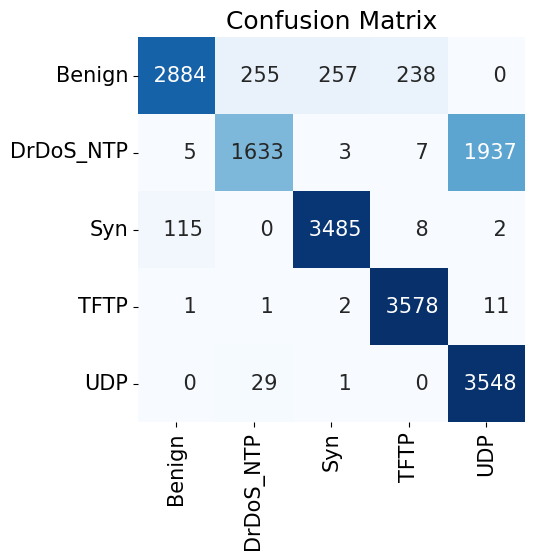

In [26]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_labels, y_pred=ada_prediction),
            annot=True,
            cmap=plt.cm.Blues,
            fmt = "5d",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [27]:
# Save the trained model to a file
with open(file="models/AdaBoostClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=ada_model, file=file)

---

# Multilayer Perceptron Model

In [28]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
y_train, y_test = to_categorical(y_train.values.ravel()), to_categorical(y_test.values.ravel())
from tensorflow.keras.layers import Dropout

In [29]:
mlp_model = Sequential()
mlp_model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L2()))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.001)))
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.001)))
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.001)))
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.001)))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(5, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.001)))

mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2496      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 512)               16896     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

In [31]:
EPOCHS = 10

history = mlp_model.fit(
    x=X_train.values,
    y=y_train,
    batch_size=64,
    epochs=EPOCHS,
    validation_data=(X_test.values,y_test),
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)]
)

Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5847 - accuracy: 0.9652 - val_loss: 0.2337 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1844 - accuracy: 0.9834 - val_loss: 0.1273 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1341 - accuracy: 0.9840 - val_loss: 0.6452 - val_accuracy: 0.8017 - lr: 0.0010
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.1008 - accuracy: 0.9898 - val_loss: 0.0810 - val_accuracy: 0.9945 - lr: 1.0000e-04
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0921 - accuracy: 0.9905 - val_loss: 0.0774 - val_accuracy: 0.9940 - lr: 1.0000e-04
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0865 - accuracy: 0.9910 - val_loss: 0.0721 - val_accuracy: 0.9938 - lr: 1.0000e-04
Epoch 7/10
1125/1125 [========================

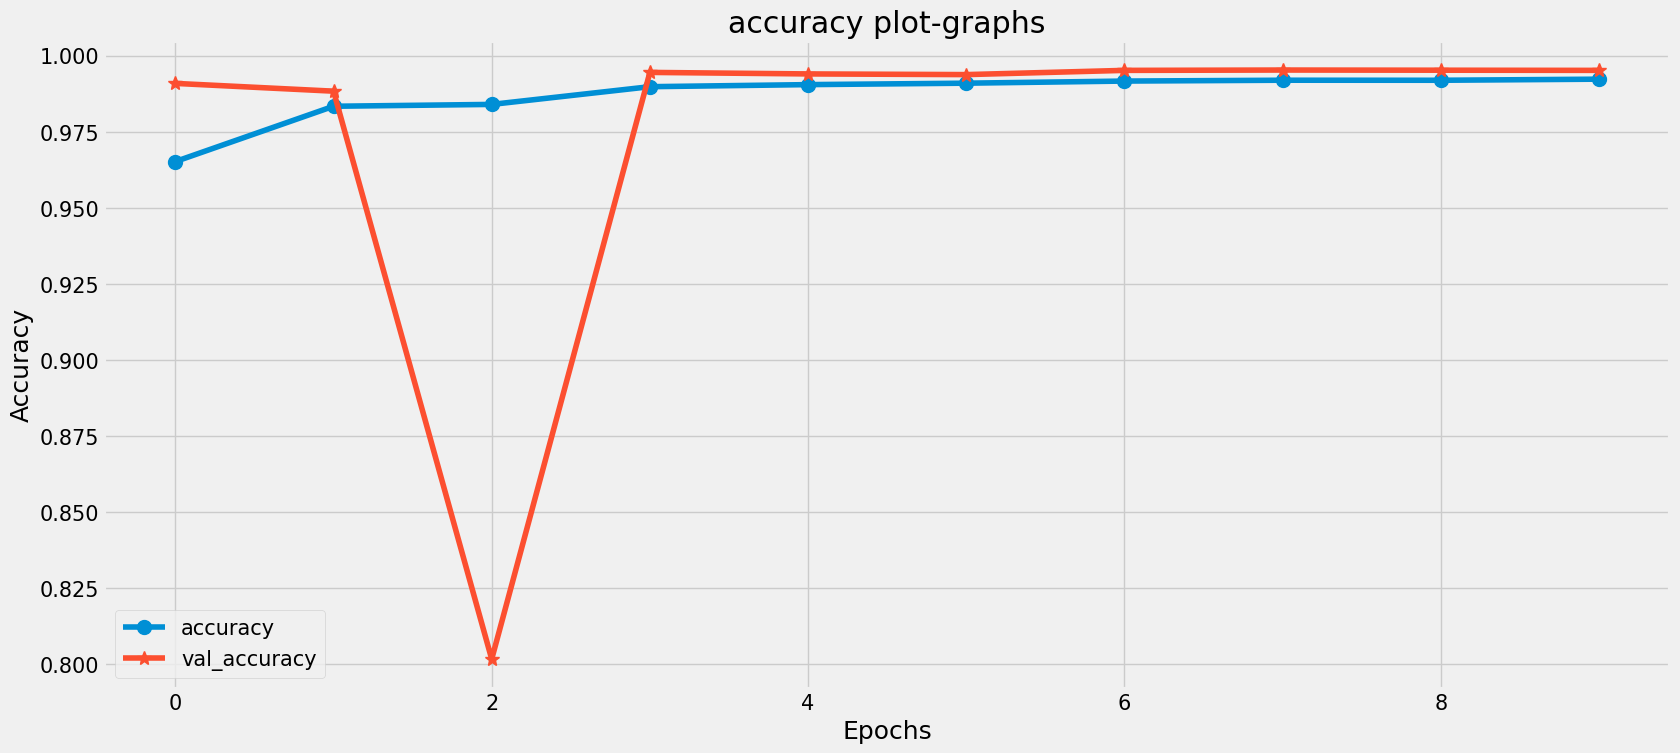

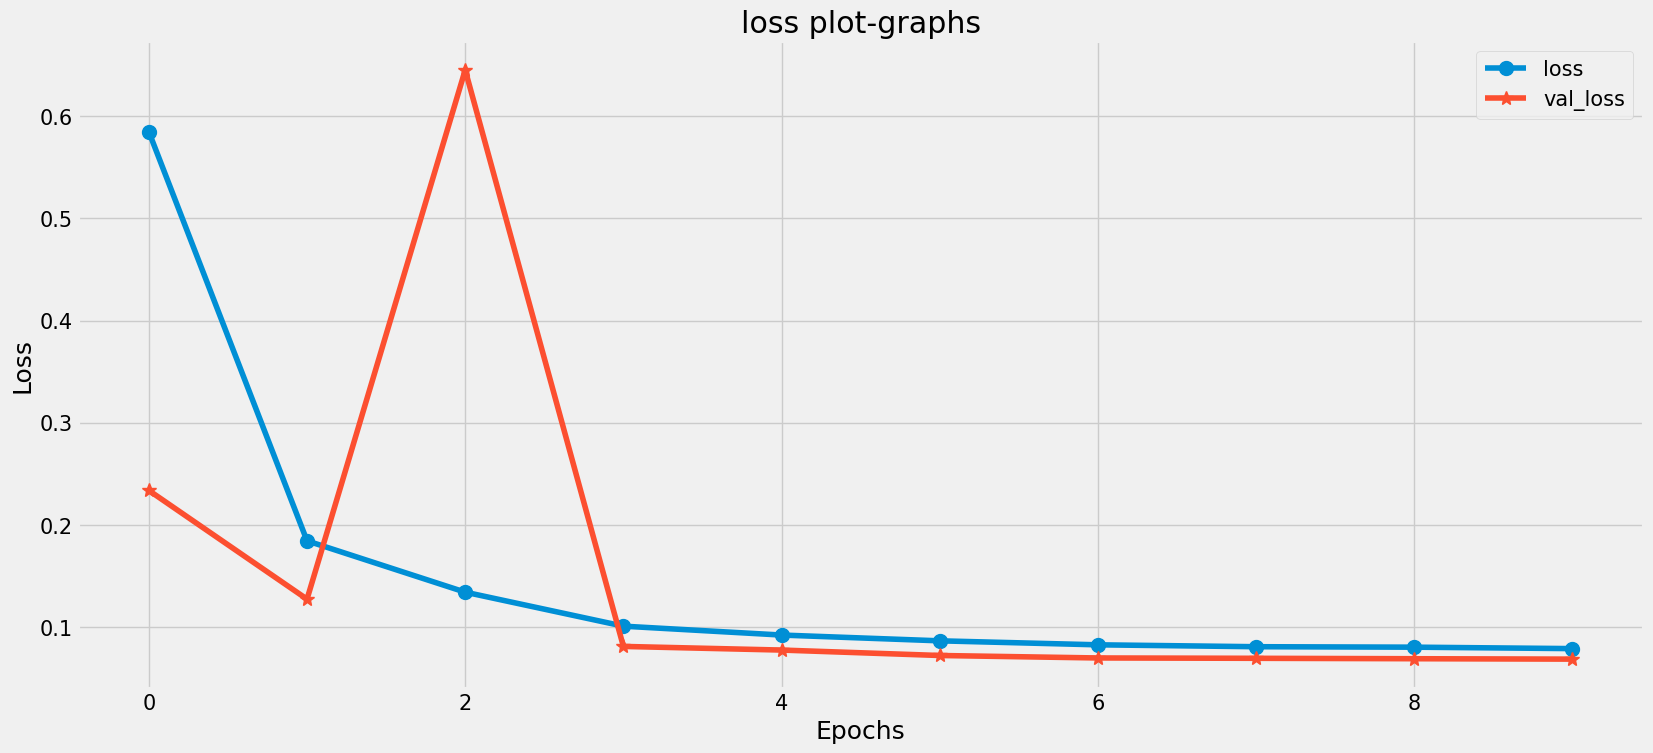

In [32]:
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(history.history["accuracy"],label="accuracy",marker="o",markersize=10)
    plt.plot(history.history["val_accuracy"],label="val_accuracy",marker="*",markersize=10)
    plt.title(label="accuracy plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(history.history["loss"],label="loss",marker="o",markersize=10)
    plt.plot(history.history["val_loss"],label="val_loss",marker="*",markersize=10)
    plt.title(label="loss plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.legend()
    plt.show()

In [33]:
mlp_prediction = mlp_model.predict(X_test, batch_size=32, verbose=1)
print(mlp_prediction)

563/563 [==============================] - 1s 800us/step
[[1.1779843e-04 3.4205796e-04 1.3798365e-04 7.0650785e-05 9.9933159e-01]
 [9.8344803e-01 4.7357958e-03 9.4274692e-03 1.8620837e-03 5.2662741e-04]
 [9.9349111e-01 2.9152716e-03 2.8168662e-03 6.6234032e-04 1.1446403e-04]
 ...
 [2.6595770e-04 6.0527822e-05 9.9862731e-01 9.9655031e-04 4.9649472e-05]
 [5.6924229e-05 5.4570548e-05 6.0125687e-05 9.9973768e-01 9.0695525e-05]
 [1.3419781e-04 3.1320385e-05 9.9909174e-01 7.1697589e-04 2.5704692e-05]]


In [34]:
mlp_prediction = np.argmax(mlp_prediction, axis=1)
print(mlp_prediction)

[4 0 0 ... 2 3 2]


In [35]:
true_labels = []
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))
print(true_labels)

[4, 0, 0, 1, 1, 0, 1, 2, 2, 3, 4, 4, 2, 1, 1, 4, 0, 1, 3, 3, 3, 4, 4, 4, 2, 1, 3, 0, 3, 1, 3, 3, 4, 1, 2, 1, 4, 3, 1, 2, 4, 0, 0, 1, 2, 2, 1, 1, 1, 2, 4, 0, 1, 4, 1, 0, 2, 1, 4, 1, 4, 0, 2, 0, 1, 4, 2, 1, 1, 0, 3, 1, 1, 0, 0, 0, 3, 2, 1, 3, 3, 3, 0, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 1, 4, 0, 3, 3, 4, 0, 1, 3, 1, 4, 2, 0, 2, 1, 4, 0, 2, 4, 3, 2, 2, 0, 0, 1, 0, 3, 1, 2, 0, 4, 3, 3, 1, 3, 0, 0, 3, 0, 0, 4, 1, 0, 2, 4, 0, 4, 4, 0, 3, 3, 2, 0, 3, 1, 4, 2, 4, 2, 3, 4, 1, 4, 0, 2, 0, 0, 2, 1, 1, 2, 0, 3, 2, 4, 2, 3, 0, 0, 1, 2, 2, 1, 3, 4, 2, 1, 0, 2, 3, 3, 3, 1, 1, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 0, 4, 1, 4, 4, 3, 1, 0, 3, 1, 0, 3, 2, 4, 0, 0, 2, 1, 0, 3, 0, 0, 1, 2, 0, 0, 4, 1, 0, 1, 3, 2, 4, 4, 1, 0, 1, 4, 2, 1, 3, 2, 2, 2, 1, 1, 2, 0, 1, 3, 3, 1, 0, 4, 0, 0, 0, 4, 1, 1, 3, 2, 3, 2, 2, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0, 2, 4, 2, 0, 3, 2, 1, 3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 4, 1, 2, 3, 2, 0, 0, 2, 0, 1, 4, 3, 0, 2, 4, 3, 2, 4, 1, 3, 1, 4, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 0, 4, 2, 1, 3, 0, 2, 4, 3, 1, 

In [36]:
mlp_model_accuracy = accuracy_score(y_true=true_labels, y_pred=mlp_prediction)
print("Validation accuracy of ArtificialNeuralNetwork model is {:.2f}%".format(mlp_model_accuracy*100))

Validation accuracy of ArtificialNeuralNetwork model is 99.52%


In [37]:
print(classification_report(y_true=true_labels, y_pred=mlp_prediction, target_names=class_labels))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      3634
   DrDoS_NTP       1.00      0.99      0.99      3585
         Syn       1.00      0.99      1.00      3610
        TFTP       1.00      1.00      1.00      3593
         UDP       0.99      1.00      0.99      3578

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



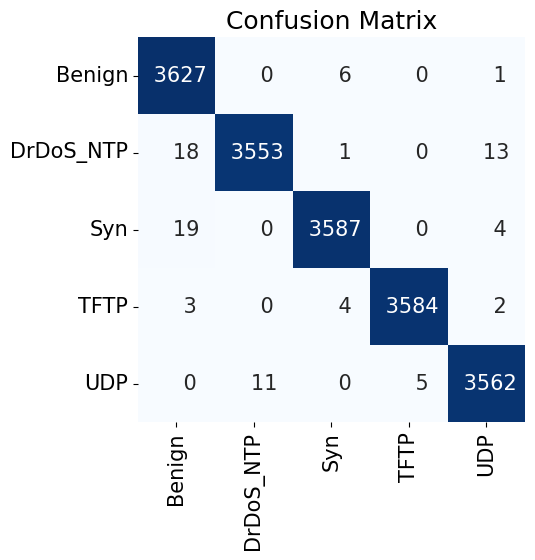

In [38]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_labels, y_pred=mlp_prediction),
            annot=True,
            cmap=plt.cm.Blues,
            fmt = "5d",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [40]:
mlp_model.save("models/MultilayerPerceptron_model.h5")

---